In [7]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

def k_means(data, k, max_iters=100):
    centroids = data[np.random.choice(range(len(data)), k, replace=False)]
    for _ in range(max_iters): 
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
        
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    return labels, centroids

data = load_iris()
X = data.data
y = data.target  
k = 3  
real_centroids = np.array([X[y == i].mean(axis=0) for i in range(k)])

num_iterations = 50
acc_scores = []

final_dataset = np.array([5] * len(y))
for _ in range(num_iterations):
    custom_labels, custom_centroids = k_means(X, k)
    for i in range(k):
        center = custom_centroids[i]
        dist = np.linalg.norm(center - real_centroids, axis=1)
        final = np.argmin(dist)  # the real value of the output
        final_dataset[custom_labels == i] = final
    acc_score = accuracy_score(y, final_dataset)
    acc_scores.append(acc_score)

# Printing the accuracy scores for each run
for i, score in enumerate(acc_scores):
    print(f'Run {i + 1} - Acc Score: {score:.4f}')

# Printing the mean and standard deviation of accuracy scores
mean_acc_score = np.mean(acc_scores)
std_acc_score = np.std(acc_scores)
print(f'\nMean Acc Score: {mean_acc_score:.4f}')
print(f'Standard Deviation of Acc Scores: {std_acc_score:.4f}')


Run 1 - Acc Score: 0.6667
Run 2 - Acc Score: 0.8867
Run 3 - Acc Score: 0.8933
Run 4 - Acc Score: 0.6667
Run 5 - Acc Score: 0.8933
Run 6 - Acc Score: 0.8867
Run 7 - Acc Score: 0.8867
Run 8 - Acc Score: 0.8867
Run 9 - Acc Score: 0.6667
Run 10 - Acc Score: 0.8933
Run 11 - Acc Score: 0.8933
Run 12 - Acc Score: 0.8867
Run 13 - Acc Score: 0.6667
Run 14 - Acc Score: 0.8867
Run 15 - Acc Score: 0.8933
Run 16 - Acc Score: 0.8867
Run 17 - Acc Score: 0.8933
Run 18 - Acc Score: 0.8933
Run 19 - Acc Score: 0.6667
Run 20 - Acc Score: 0.8867
Run 21 - Acc Score: 0.8867
Run 22 - Acc Score: 0.8933
Run 23 - Acc Score: 0.8867
Run 24 - Acc Score: 0.8933
Run 25 - Acc Score: 0.6667
Run 26 - Acc Score: 0.8867
Run 27 - Acc Score: 0.8933
Run 28 - Acc Score: 0.6667
Run 29 - Acc Score: 0.8867
Run 30 - Acc Score: 0.8933
Run 31 - Acc Score: 0.6667
Run 32 - Acc Score: 0.6667
Run 33 - Acc Score: 0.6667
Run 34 - Acc Score: 0.8933
Run 35 - Acc Score: 0.6667
Run 36 - Acc Score: 0.8933
Run 37 - Acc Score: 0.8933
Run 38 - A

In [8]:
from sklearn.cluster import KMeans

data = load_iris()
X = data.data
y_true = data.target
n_clusters = 3

accuracy_scores = []

num_iterations = 50
for _ in range(num_iterations):
    final_dataset = np.empty(len(y_true), dtype=int)
    kmeans = KMeans(n_clusters=n_clusters, n_init=1).fit(X)
    
    # Finding the label mapping to the true labels
    label_mapping = {}
    for cluster_label in np.unique(kmeans.labels_):
        cluster_indices = np.where(kmeans.labels_ == cluster_label)[0]
        true_labels = y_true[cluster_indices]
        most_common_label = np.bincount(true_labels).argmax()
        label_mapping[cluster_label] = most_common_label
    
    # Mapping the cluster labels to the true labels
    for cluster_label, true_label in label_mapping.items():
        final_dataset[kmeans.labels_ == cluster_label] = true_label

    accuracy = accuracy_score(y_true, final_dataset)
    accuracy_scores.append(accuracy)

for i, score in enumerate(accuracy_scores):
    print(f'Run {i + 1} - Acc Score: {score:.4f}')

# Printing the mean and standard deviation of accuracy scores
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)
print(f'\nMean Acc Score: {mean_accuracy:.4f}')
print(f'Standard Deviation of Acc Scores: {std_accuracy:.4f}')


Run 1 - Acc Score: 0.8867
Run 2 - Acc Score: 0.8933
Run 3 - Acc Score: 0.8867
Run 4 - Acc Score: 0.8867
Run 5 - Acc Score: 0.8933
Run 6 - Acc Score: 0.8933
Run 7 - Acc Score: 0.8933
Run 8 - Acc Score: 0.8867
Run 9 - Acc Score: 0.8867
Run 10 - Acc Score: 0.8933
Run 11 - Acc Score: 0.8933
Run 12 - Acc Score: 0.8867
Run 13 - Acc Score: 0.8867
Run 14 - Acc Score: 0.8933
Run 15 - Acc Score: 0.8933
Run 16 - Acc Score: 0.8933
Run 17 - Acc Score: 0.8867
Run 18 - Acc Score: 0.8867
Run 19 - Acc Score: 0.8867
Run 20 - Acc Score: 0.8867
Run 21 - Acc Score: 0.8867
Run 22 - Acc Score: 0.8933
Run 23 - Acc Score: 0.8933
Run 24 - Acc Score: 0.8867
Run 25 - Acc Score: 0.8933
Run 26 - Acc Score: 0.8867
Run 27 - Acc Score: 0.8933
Run 28 - Acc Score: 0.8933
Run 29 - Acc Score: 0.8867
Run 30 - Acc Score: 0.8867
Run 31 - Acc Score: 0.8933
Run 32 - Acc Score: 0.8933
Run 33 - Acc Score: 0.8867
Run 34 - Acc Score: 0.8933
Run 35 - Acc Score: 0.8867
Run 36 - Acc Score: 0.8933
Run 37 - Acc Score: 0.8867
Run 38 - A

In [9]:
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

############# My Custom kmeans function
def k_means(data, k, max_iters=100):
    centroids = data[np.random.choice(range(len(data)), k, replace=False)]
    for _ in range(max_iters): 
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
        
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    return labels, centroids

data = load_iris()
X = data.data
y = data.target  
k = 3  
real_centroids = np.array([X[y == i].mean(axis=0) for i in range(k)])

# Storing accuracy scores for custom k-means
num_iterations = 50
acc_scores_custom = []

for _ in range(num_iterations):
    final_dataset = np.array([5] * len(y))
    custom_labels, custom_centroids = k_means(X, k)
    
    for i in range(k):
        center = custom_centroids[i]
        dist = np.linalg.norm(center - real_centroids, axis=1)
        final = np.argmin(dist)  # the real value of the output
        final_dataset[custom_labels == i] = final
    
    acc_score = accuracy_score(y, final_dataset)
    acc_scores_custom.append(acc_score)

############## Scikit-learn KMeans accuracy scores
accuracy_scores = []
num_iterations = 50

for _ in range(num_iterations):
    final_dataset = np.empty(len(y), dtype=int)
    kmeans = KMeans(n_clusters=k, n_init=1).fit(X)
    
    # Finding the label mapping to the true labels
    label_mapping = {}
    for cluster_label in np.unique(kmeans.labels_):
        cluster_indices = np.where(kmeans.labels_ == cluster_label)[0]
        true_labels = y[cluster_indices]
        most_common_label = np.bincount(true_labels).argmax()
        label_mapping[cluster_label] = most_common_label
    
    # Mapping the cluster labels to the true labels
    for cluster_label, true_label in label_mapping.items():
        final_dataset[kmeans.labels_ == cluster_label] = true_label

    accuracy = accuracy_score(y, final_dataset)
    accuracy_scores.append(accuracy)

# Plotting boxplot using Plotly
fig = go.Figure()

fig.add_trace(go.Box(y=acc_scores_custom, name='Custom KMeans'))
fig.add_trace(go.Box(y=accuracy_scores, name='Scikit-learn KMeans'))

fig.update_layout(
    title='Comparison of Custom vs. Scikit-learn KMeans',
    yaxis=dict(title='Accuracy Score'),
    xaxis=dict(title='KMeans Implementation'),
)

fig.show()


ModuleNotFoundError: No module named 'plotly'

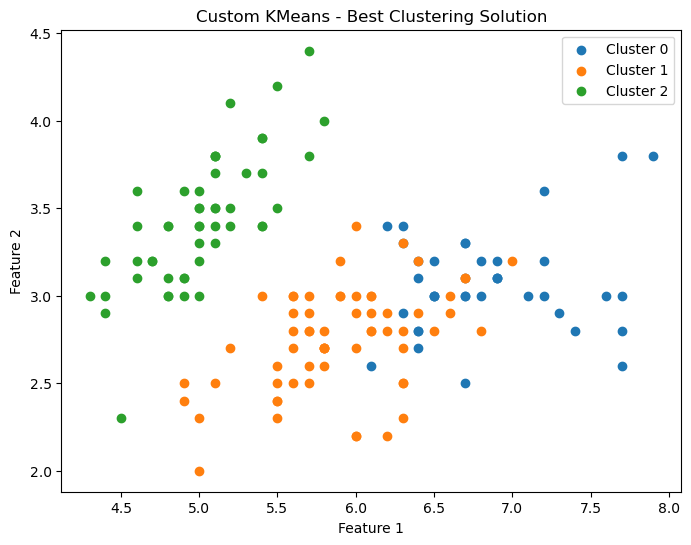

In [ ]:
def k_means(data, k, max_iters=100):
    centroids = data[np.random.choice(range(len(data)), k, replace=False)]
    for _ in range(max_iters):
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)

        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])

        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return labels, centroids

data = load_iris()
X = data.data
y = data.target
k = 3
real_centroids = np.array([X[y == i].mean(axis=0) for i in range(k)])

best_accuracy = 0
best_labels = None

num_iterations = 50
for _ in range(num_iterations):
    custom_labels, custom_centroids = k_means(X, k)
    final_dataset = np.array([5] * len(y))
    for i in range(k):
        center = custom_centroids[i]
        dist = np.linalg.norm(center - real_centroids, axis=1)
        final = np.argmin(dist)  # the real value of the output
        final_dataset[custom_labels == i] = final
    acc_score = accuracy_score(y, final_dataset)
    if acc_score > best_accuracy:
        best_accuracy = acc_score
        best_labels = custom_labels

# Plotting the best clustering solution
plt.figure(figsize=(8, 6))
for cluster in range(k):
    cluster_points = X[best_labels == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}')
plt.legend()
plt.title('Custom KMeans - Best Clustering Solution')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


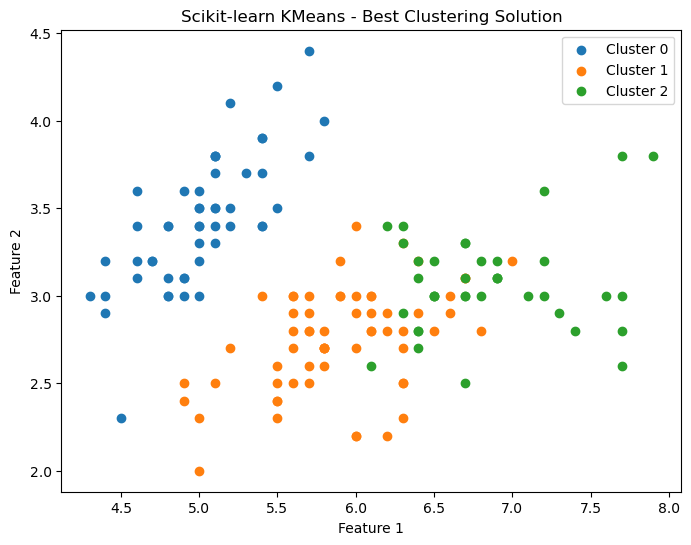

In [ ]:
data = load_iris()
X = data.data
y_true = data.target
n_clusters = 3

best_accuracy = 0
best_labels = None

num_iterations = 50
for _ in range(num_iterations):
    final_dataset = np.empty(len(y_true), dtype=int)
    kmeans = KMeans(n_clusters=n_clusters, n_init=1).fit(X)

    # Finding the label mapping to the true labels
    label_mapping = {}
    for cluster_label in np.unique(kmeans.labels_):
        cluster_indices = np.where(kmeans.labels_ == cluster_label)[0]
        true_labels = y_true[cluster_indices]
        most_common_label = np.bincount(true_labels).argmax()
        label_mapping[cluster_label] = most_common_label

    # Mapping the cluster labels to the true labels
    for cluster_label, true_label in label_mapping.items():
        final_dataset[kmeans.labels_ == cluster_label] = true_label

    accuracy = accuracy_score(y_true, final_dataset)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_labels = kmeans.labels_

# Plotting the best clustering solution
plt.figure(figsize=(8, 6))
for cluster in range(n_clusters):
    cluster_points = X[best_labels == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}')
plt.legend()
plt.title('Scikit-learn KMeans - Best Clustering Solution')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


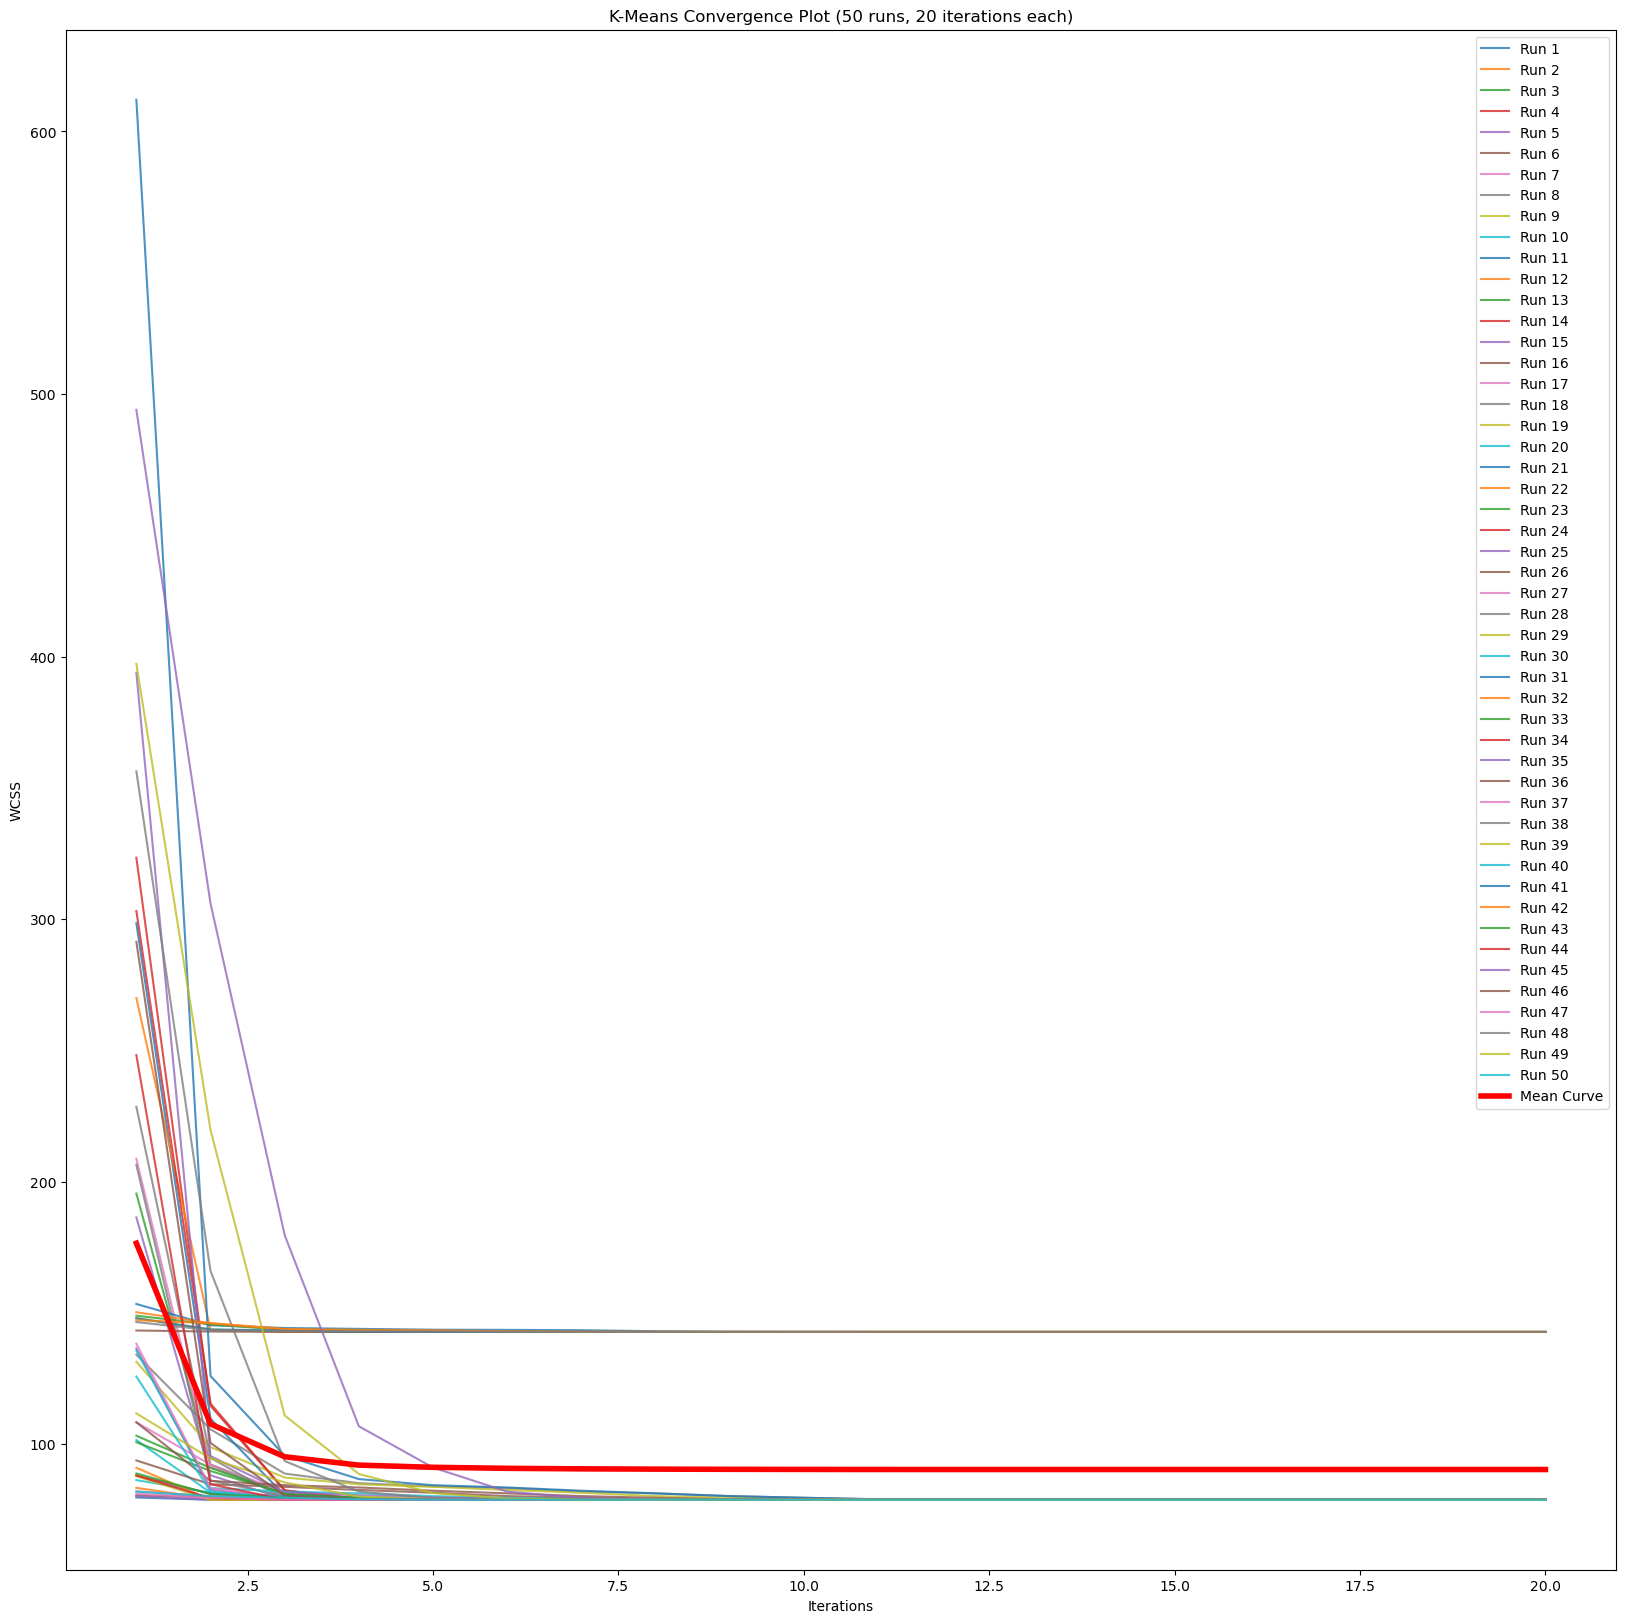

In [ ]:
def k_means(data, k, max_iters=100):
    centroids = data[np.random.choice(range(len(data)), k, replace=False)]
    wcss_values = []
    
    for _ in range(max_iters):
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        
        wcss = 0
        for i in range(k):
            cluster_points = data[labels == i]
            if len(cluster_points) > 0:
                centroid = cluster_points.mean(axis=0)
                wcss += np.sum(np.linalg.norm(cluster_points - centroid, axis=1)**2)
        
        wcss_values.append(wcss)
        
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
        
        centroids = new_centroids
    
    # Extend wcss_values to reach max_iters
    wcss_values.extend([wcss_values[-1]] * (max_iters - len(wcss_values)))
    
    return wcss_values

data = load_iris()
X = data.data
k = 3

num_iterations = 50
max_iters_per_run = 20
wcss_results = []

for _ in range(num_iterations):
    wcss = k_means(X, k, max_iters=max_iters_per_run)
    wcss_results.append(wcss)

# Convert the list of curves into a NumPy array
wcss_matrix = np.array(wcss_results)

# Plotting WCSS convergence for each run
plt.figure(figsize=(20, 20))
for i in range(num_iterations):
    plt.plot(range(1, max_iters_per_run + 1), wcss_matrix[i], label=f'Run {i + 1}', alpha=0.8)

# Plotting the mean curve with a larger line width
mean_curve = np.mean(wcss_matrix, axis=0)
plt.plot(range(1, max_iters_per_run + 1), mean_curve, label='Mean Curve', linewidth=4, color='red')

plt.xlabel('Iterations')
plt.ylabel('WCSS')
plt.title(f'K-Means Convergence Plot ({num_iterations} runs, {max_iters_per_run} iterations each)')
plt.legend()
plt.show()


In [ ]:
from sklearn.datasets import load_digits
import numpy as np
def k_means(data, k, max_iters=100):
    centroids = data[np.random.choice(range(len(data)), k, replace=False)]
    for _ in range(max_iters): 
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
        
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    return labels, centroids

data, labels = load_digits(return_X_y=True)
k = 10  # number of clusters for digits dataset
real_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])

num_iterations = 50
acc_scores = []

final_dataset = np.array([5] * len(labels))
for _ in range(num_iterations):
    custom_labels, custom_centroids = k_means(data, k)
    for i in range(k):
        center = custom_centroids[i]
        dist = np.linalg.norm(center - real_centroids, axis=1)
        final = np.argmin(dist)  # the real value of the output
        final_dataset[custom_labels == i] = final
    acc_score = accuracy_score(labels, final_dataset)
    acc_scores.append(acc_score)

# Printing the accuracy scores for each run
for i, score in enumerate(acc_scores):
    print(f'Run {i + 1} - Acc Score: {score:.4f}')

# Printing the mean and standard deviation of accuracy scores
mean_acc_score = np.mean(acc_scores)
std_acc_score = np.std(acc_scores)
print(f'\nMean Acc Score: {mean_acc_score:.4f}')
print(f'Standard Deviation of Acc Scores: {std_acc_score:.4f}')
data.shape


Run 1 - Acc Score: 0.6895
Run 2 - Acc Score: 0.7501
Run 3 - Acc Score: 0.7151
Run 4 - Acc Score: 0.7162
Run 5 - Acc Score: 0.8130
Run 6 - Acc Score: 0.7423
Run 7 - Acc Score: 0.7334
Run 8 - Acc Score: 0.7963
Run 9 - Acc Score: 0.7713
Run 10 - Acc Score: 0.7357
Run 11 - Acc Score: 0.7624
Run 12 - Acc Score: 0.7101
Run 13 - Acc Score: 0.7440
Run 14 - Acc Score: 0.7902
Run 15 - Acc Score: 0.7212
Run 16 - Acc Score: 0.8125
Run 17 - Acc Score: 0.7095
Run 18 - Acc Score: 0.7724
Run 19 - Acc Score: 0.7257
Run 20 - Acc Score: 0.7919
Run 21 - Acc Score: 0.7930
Run 22 - Acc Score: 0.7145
Run 23 - Acc Score: 0.7195
Run 24 - Acc Score: 0.7151
Run 25 - Acc Score: 0.7379
Run 26 - Acc Score: 0.7863
Run 27 - Acc Score: 0.7223
Run 28 - Acc Score: 0.7140
Run 29 - Acc Score: 0.7212
Run 30 - Acc Score: 0.7841
Run 31 - Acc Score: 0.7691
Run 32 - Acc Score: 0.7257
Run 33 - Acc Score: 0.7991
Run 34 - Acc Score: 0.7624
Run 35 - Acc Score: 0.7902
Run 36 - Acc Score: 0.7156
Run 37 - Acc Score: 0.7156
Run 38 - A

(1797, 64)

In [ ]:
from sklearn.cluster import KMeans

data = load_digits()
X = data.data
y_true = data.target
n_clusters = 10

accuracy_scores = []

num_iterations = 50
for _ in range(num_iterations):
    final_dataset = np.empty(len(y_true), dtype=int)
    kmeans = KMeans(n_clusters=n_clusters, n_init=1).fit(X)
    
    # Finding the label mapping to the true labels
    label_mapping = {}
    for cluster_label in np.unique(kmeans.labels_):
        cluster_indices = np.where(kmeans.labels_ == cluster_label)[0]
        true_labels = y_true[cluster_indices]
        most_common_label = np.bincount(true_labels).argmax()
        label_mapping[cluster_label] = most_common_label
    
    # Mapping the cluster labels to the true labels
    for cluster_label, true_label in label_mapping.items():
        final_dataset[kmeans.labels_ == cluster_label] = true_label

    accuracy = accuracy_score(y_true, final_dataset)
    accuracy_scores.append(accuracy)

for i, score in enumerate(accuracy_scores):
    print(f'Run {i + 1} - Acc Score: {score:.4f}')

# Printing the mean and standard deviation of accuracy scores
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)
print(f'\nMean Acc Score: {mean_accuracy:.4f}')
print(f'Standard Deviation of Acc Scores: {std_accuracy:.4f}')


Run 1 - Acc Score: 0.7440
Run 2 - Acc Score: 0.7874
Run 3 - Acc Score: 0.7935
Run 4 - Acc Score: 0.7629
Run 5 - Acc Score: 0.7913
Run 6 - Acc Score: 0.7891
Run 7 - Acc Score: 0.7947
Run 8 - Acc Score: 0.7435
Run 9 - Acc Score: 0.7279
Run 10 - Acc Score: 0.7379
Run 11 - Acc Score: 0.7629
Run 12 - Acc Score: 0.7930
Run 13 - Acc Score: 0.7234
Run 14 - Acc Score: 0.7885
Run 15 - Acc Score: 0.6422
Run 16 - Acc Score: 0.7902
Run 17 - Acc Score: 0.7201
Run 18 - Acc Score: 0.8637
Run 19 - Acc Score: 0.7379
Run 20 - Acc Score: 0.7913
Run 21 - Acc Score: 0.7930
Run 22 - Acc Score: 0.7301
Run 23 - Acc Score: 0.7885
Run 24 - Acc Score: 0.7885
Run 25 - Acc Score: 0.7930
Run 26 - Acc Score: 0.7796
Run 27 - Acc Score: 0.7919
Run 28 - Acc Score: 0.7869
Run 29 - Acc Score: 0.7913
Run 30 - Acc Score: 0.7924
Run 31 - Acc Score: 0.7295
Run 32 - Acc Score: 0.7412
Run 33 - Acc Score: 0.8692
Run 34 - Acc Score: 0.7852
Run 35 - Acc Score: 0.7813
Run 36 - Acc Score: 0.7947
Run 37 - Acc Score: 0.7941
Run 38 - A

In [ ]:
import plotly.graph_objects as go

def k_means(data, k, max_iters=100):
    centroids = data[np.random.choice(range(len(data)), k, replace=False)]
    for _ in range(max_iters): 
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
        
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    return labels, centroids

# Custom KMeans
data, labels = load_digits(return_X_y=True)
k = 10
real_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])

num_iterations = 50
acc_scores_custom = []

final_dataset = np.array([5] * len(labels))
for _ in range(num_iterations):
    custom_labels, custom_centroids = k_means(data, k)
    for i in range(k):
        center = custom_centroids[i]
        dist = np.linalg.norm(center - real_centroids, axis=1)
        final = np.argmin(dist)  # the real value of the output
        final_dataset[custom_labels == i] = final
    acc_score = accuracy_score(labels, final_dataset)
    acc_scores_custom.append(acc_score)

# Scikit-learn KMeans
data = load_digits()
X = data.data
y_true = data.target
n_clusters = 10

accuracy_scores_sklearn = []

num_iterations = 50
for _ in range(num_iterations):
    final_dataset = np.empty(len(y_true), dtype=int)
    kmeans = KMeans(n_clusters=n_clusters, n_init=1).fit(X)
    
    label_mapping = {}
    for cluster_label in np.unique(kmeans.labels_):
        cluster_indices = np.where(kmeans.labels_ == cluster_label)[0]
        true_labels = y_true[cluster_indices]
        most_common_label = np.bincount(true_labels).argmax()
        label_mapping[cluster_label] = most_common_label
    
    for cluster_label, true_label in label_mapping.items():
        final_dataset[kmeans.labels_ == cluster_label] = true_label

    accuracy = accuracy_score(y_true, final_dataset)
    accuracy_scores_sklearn.append(accuracy)

# Plotting boxplot using Plotly
fig = go.Figure()

fig.add_trace(go.Box(y=acc_scores_custom, name='Custom KMeans'))
fig.add_trace(go.Box(y=accuracy_scores_sklearn, name='Scikit-learn KMeans'))

fig.update_layout(
    title='Comparison of Custom vs. Scikit-learn KMeans on Digits Dataset',
    yaxis=dict(title='Accuracy Score'),
    xaxis=dict(title='KMeans Implementation'),
)

fig.show()


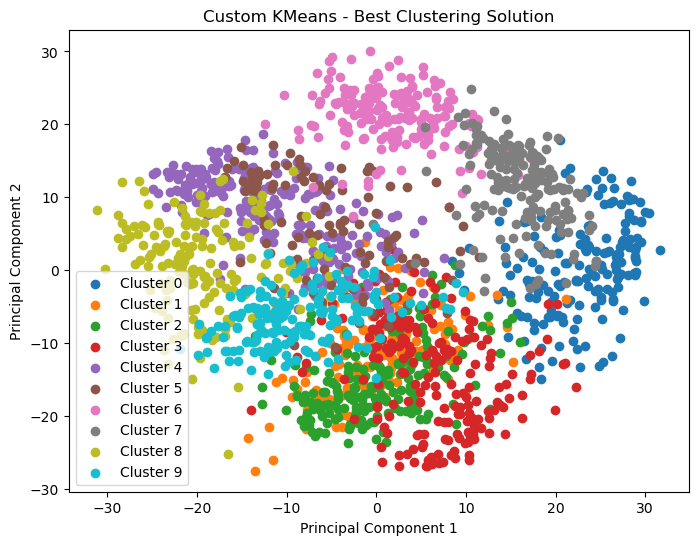


Mean Acc Score: 0.7467
Standard Deviation of Acc Scores: 0.0469


In [ ]:
from sklearn.decomposition import PCA

def k_means(data, k, max_iters=100):
    centroids = data[np.random.choice(range(len(data)), k, replace=False)]
    for _ in range(max_iters): 
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
        
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    return labels, centroids

data, labels = load_digits(return_X_y=True)
k = 10
real_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])

num_iterations = 50
acc_scores = []

final_dataset = np.array([5] * len(labels))
best_accuracy = 0
best_labels = None

for _ in range(num_iterations):
    custom_labels, custom_centroids = k_means(data, k)
    for i in range(k):
        center = custom_centroids[i]
        dist = np.linalg.norm(center - real_centroids, axis=1)
        final = np.argmin(dist)  # the real value of the output
        final_dataset[custom_labels == i] = final
    acc_score = accuracy_score(labels, final_dataset)
    acc_scores.append(acc_score)
    
    if acc_score > best_accuracy:
        best_accuracy = acc_score
        best_labels = custom_labels

# Using PCA to reduce dimensions for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)

# Plotting the best clustering solution from custom KMeans
plt.figure(figsize=(8, 6))
for cluster in range(k):
    cluster_points = data_pca[best_labels == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}')
plt.legend()
plt.title('Custom KMeans - Best Clustering Solution')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

mean_acc_score = np.mean(acc_scores)
std_acc_score = np.std(acc_scores)
print(f'\nMean Acc Score: {mean_acc_score:.4f}')
print(f'Standard Deviation of Acc Scores: {std_acc_score:.4f}')


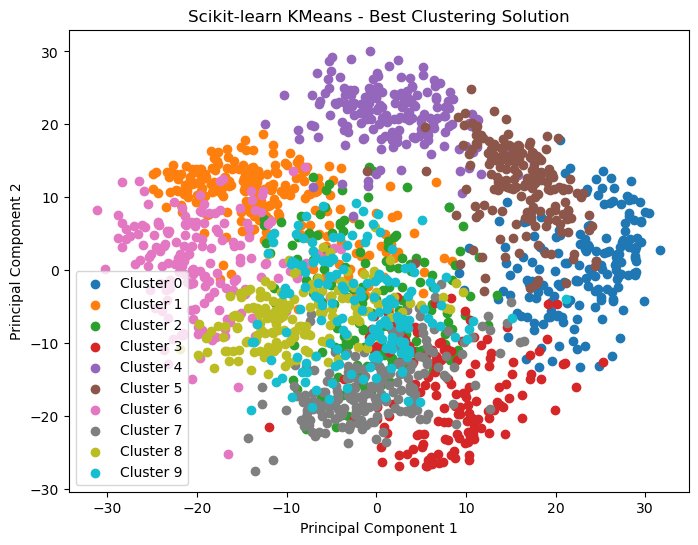


Mean Acc Score: 0.7762
Standard Deviation of Acc Scores: 0.0345


In [ ]:
data = load_digits()
X = data.data
y_true = data.target
n_clusters = 10

accuracy_scores = []

num_iterations = 50
best_accuracy = 0
best_labels = None

for _ in range(num_iterations):
    final_dataset = np.empty(len(y_true), dtype=int)
    kmeans = KMeans(n_clusters=n_clusters, n_init=1).fit(X)
    
    # Finding the label mapping to the true labels
    label_mapping = {}
    for cluster_label in np.unique(kmeans.labels_):
        cluster_indices = np.where(kmeans.labels_ == cluster_label)[0]
        true_labels = y_true[cluster_indices]
        most_common_label = np.bincount(true_labels).argmax()
        label_mapping[cluster_label] = most_common_label
    
    # Mapping the cluster labels to the true labels
    for cluster_label, true_label in label_mapping.items():
        final_dataset[kmeans.labels_ == cluster_label] = true_label

    accuracy = accuracy_score(y_true, final_dataset)
    accuracy_scores.append(accuracy)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_labels = kmeans.labels_

# Using PCA to reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plotting the best clustering solution from scikit-learn KMeans
plt.figure(figsize=(8, 6))
for cluster in range(n_clusters):
    cluster_points = X_pca[best_labels == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}')
plt.legend()
plt.title('Scikit-learn KMeans - Best Clustering Solution')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)
print(f'\nMean Acc Score: {mean_accuracy:.4f}')
print(f'Standard Deviation of Acc Scores: {std_accuracy:.4f}')


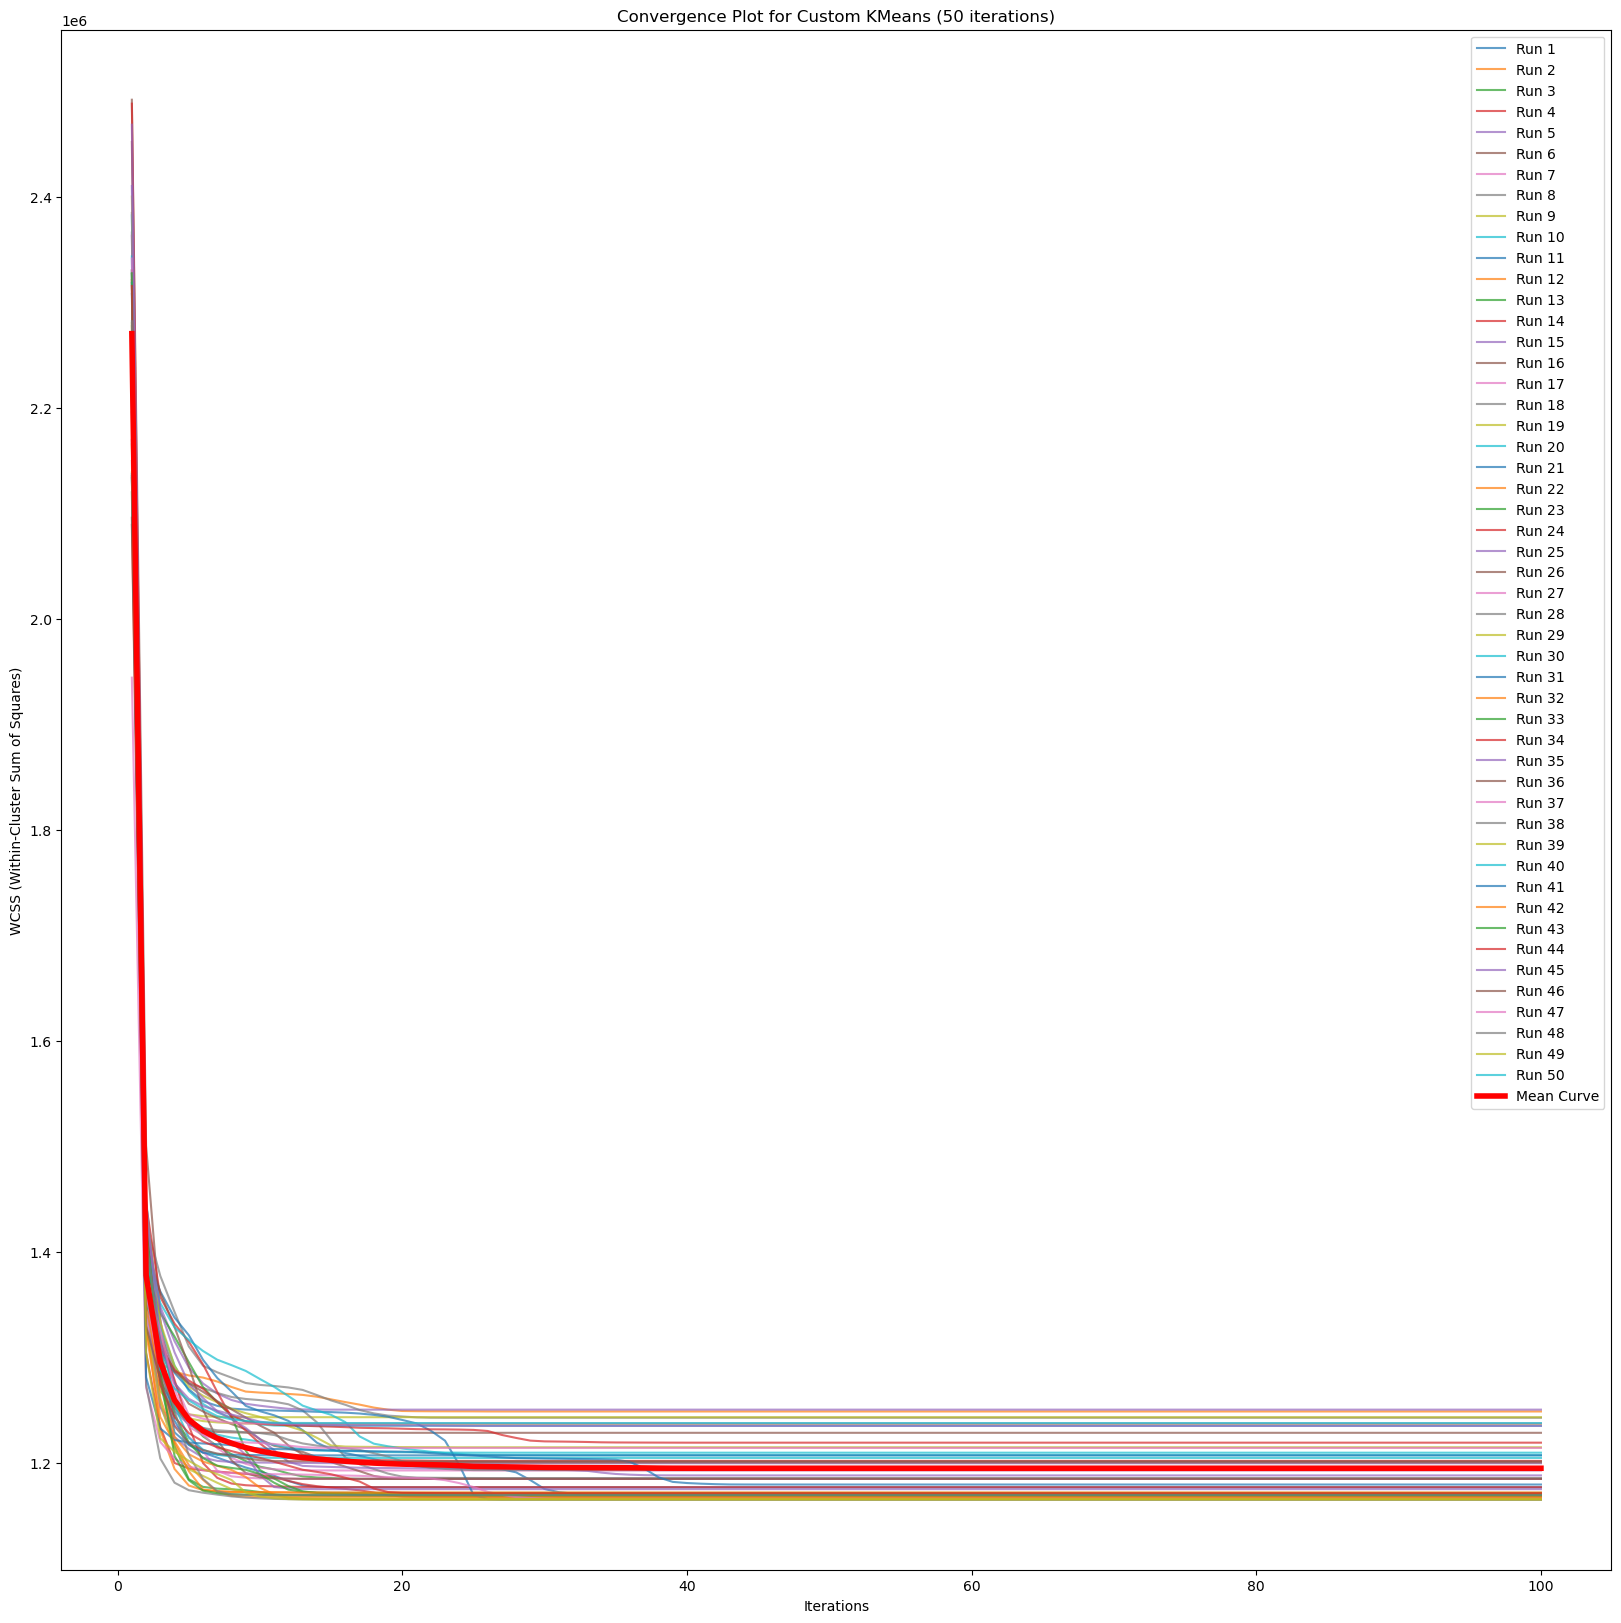

In [ ]:
def k_means(data, k, max_iters=100):
    centroids = data[np.random.choice(range(len(data)), k, replace=False)]
    wcss_values = []
    
    for _ in range(max_iters): 
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        
        wcss = 0
        for i in range(k):
            cluster_points = data[labels == i]
            if len(cluster_points) > 0:
                wcss += np.sum((cluster_points - centroids[i])**2)
        
        wcss_values.append(wcss)
        
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
        
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    # Extending the values to reach max_iters
    wcss_values.extend([wcss_values[-1]] * (max_iters - len(wcss_values)))
    
    return wcss_values

data, _ = load_digits(return_X_y=True)
k = 10 

num_iterations = 50
convergence_lines = []

for _ in range(num_iterations):
    wcss = k_means(data, k)
    convergence_lines.append(wcss)

wcss_matrix = np.array(convergence_lines)

# Plotting WCSS convergence for each run
plt.figure(figsize=(20, 20))
for i in range(num_iterations):
    plt.plot(range(1, len(convergence_lines[i]) + 1), wcss_matrix[i], label=f'Run {i + 1}', alpha=0.7)

# Plotting the mean curve with a large line width
mean_curve = np.mean(wcss_matrix, axis=0)
plt.plot(range(1, len(mean_curve) + 1), mean_curve, label='Mean Curve', linewidth=4, color='red')

plt.xlabel('Iterations')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title(f'Convergence Plot for Custom KMeans ({num_iterations} iterations)')
plt.legend()
plt.show()


In [ ]:
from sklearn.datasets import load_digits

# Load the digits dataset
digits = load_digits()

# Number of records and features
num_records = len(digits.data)
num_features = len(digits.data[0])

print(f"Number of records: {num_records}")
print(f"Number of features: {num_features}")


Number of records: 1797
Number of features: 64
